In [1]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=42)

In [2]:
news_data.target

array([10,  3, 17, ...,  3,  1,  7])

In [3]:
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
print(news_data['data'][0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [5]:
# 훈련 데이터 가져오기. header, footers, 특수문자를 제거하고 불러오기
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=42)
X_train = train_news['data']
y_train = train_news['target']

test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=42)
X_test = test_news['data']
y_test = test_news['target']

In [6]:
import pandas as pd

train_df = pd.DataFrame(X_train, columns=['data'])
train_df['target'] = y_train
test_df = pd.DataFrame(X_test, columns=['data'])
test_df['target'] = y_test

train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [7]:
test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    7532 non-null   object
 1   target  7532 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 88.4+ KB


In [10]:
train_df.nunique()

data      10994
target       20
dtype: int64

In [11]:
train_df = train_df.drop_duplicates(subset=['data'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10994 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    10994 non-null  object
 1   target  10994 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 214.7+ KB


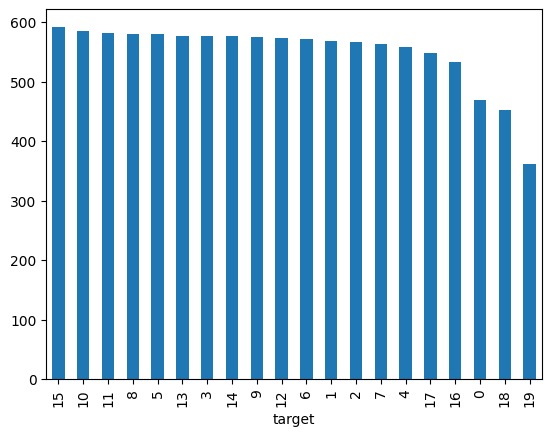

In [15]:
# target 비율 확인
import matplotlib.pyplot as plt

train_df['target'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# 결측치 확인

train_df.isnull().values.sum()

0

In [17]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
train_df['data_lower'] = train_df['data'].apply(lambda x : x.lower())
train_df.head()

,data,target,data_lower
0,I was wondering if anyone out there could enli...,7,i was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...,4,a fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh...",4,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...,1,\ndo you have weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,"from article <c5owcb.n3p@world.std.com>, by to..."


In [19]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
def clean_text(text):
    words = nltk.word_tokenize(text)
    cleaned_words = [word for word in words if re.match("^[a-zA-Z]+$", word)]
    remove_stopwords = [word for word in cleaned_words if word not in stop_words]
    cleaned_text = ' '.join(remove_stopwords)
    return cleaned_text

In [53]:
train_df['data_cleaned'] = train_df['data_lower'].apply(clean_text)
train_df.head()

,data,target,data_lower,data_cleaned
0,I was wondering if anyone out there could enli...,7,i was wondering if anyone out there could enli...,wondering anyone could enlighten car saw day s...
1,A fair number of brave souls who upgraded thei...,4,a fair number of brave souls who upgraded thei...,fair number brave souls upgraded si clock osci...
2,"well folks, my mac plus finally gave up the gh...",4,"well folks, my mac plus finally gave up the gh...",well folks mac plus finally gave ghost weekend...
3,\nDo you have Weitek's address/phone number? ...,1,\ndo you have weitek's address/phone number? ...,weitek number like get information chip
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,"from article <c5owcb.n3p@world.std.com>, by to...",article tombaker tom baker understanding error...


In [53]:
train_df['data_cleaned'] = train_df['data_lower'].apply(clean_text)
train_df.head()

,data,target,data_lower,data_cleaned
0,I was wondering if anyone out there could enli...,7,i was wondering if anyone out there could enli...,wondering anyone could enlighten car saw day s...
1,A fair number of brave souls who upgraded thei...,4,a fair number of brave souls who upgraded thei...,fair number brave souls upgraded si clock osci...
2,"well folks, my mac plus finally gave up the gh...",4,"well folks, my mac plus finally gave up the gh...",well folks mac plus finally gave ghost weekend...
3,\nDo you have Weitek's address/phone number? ...,1,\ndo you have weitek's address/phone number? ...,weitek number like get information chip
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,"from article <c5owcb.n3p@world.std.com>, by to...",article tombaker tom baker understanding error...


In [54]:
train_df.shape

(10961, 4)

In [55]:
# 텍스트 전처리 후 공백이 된 data 삭제
train_df['data_cleaned'].loc[train_df['data_cleaned'] == ''].value_counts()

Series([], Name: count, dtype: int64)

In [56]:
import numpy as np

train_df['data_cleaned'].replace('', np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10961 entries, 0 to 11313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          10961 non-null  object
 1   target        10961 non-null  int32 
 2   data_lower    10961 non-null  object
 3   data_cleaned  10961 non-null  object
dtypes: int32(1), object(3)
memory usage: 385.3+ KB


In [57]:
# test data 전처리

test_df = test_df.drop_duplicates(subset=['data'])
test_df['data_lower'] = test_df['data'].apply(lambda x : x.lower())
test_df['data_cleaned'] = test_df['data_lower'].apply(clean_text)
test_df['data_cleaned'].replace('', np.nan, inplace=True)
test_df.dropna(inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7281 entries, 0 to 7531
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          7281 non-null   object
 1   target        7281 non-null   int32 
 2   data_lower    7281 non-null   object
 3   data_cleaned  7281 non-null   object
dtypes: int32(1), object(3)
memory usage: 256.0+ KB


In [58]:
train_preprocessed = train_df[['data_cleaned', 'target']]
test_preprocessed = test_df[['data_cleaned', 'target']]

train_preprocessed.head()

,data_cleaned,target
0,wondering anyone could enlighten car saw day s...,7
1,fair number brave souls upgraded si clock osci...,4
2,well folks mac plus finally gave ghost weekend...,4
3,weitek number like get information chip,1
4,article tombaker tom baker understanding error...,14


In [59]:
# train, test set 준비

X_train = train_preprocessed['data_cleaned']
y_train = train_preprocessed['target']
X_test = test_preprocessed['data_cleaned']
y_test = test_preprocessed['target']

In [60]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100000).fit(X_train_tfidf, y_train)
lr

LogisticRegression(max_iter=100000)

In [62]:
from sklearn.metrics import accuracy_score

lr_pred = lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, lr_pred))

Accuracy: 0.69234995192968


In [63]:
def sentiment_predict(sentence):
  cleaned_text = clean_text(sentence)

  text_vector = tfidf_vectorizer.transform([cleaned_text])

  pred = lr.predict(text_vector)
  print(sentence, "====>", pred)

In [65]:
text = input()
sentiment_predict(text)

 baseball


baseball ====> [9]
